In [4]:
import numpy as np
import matplotlib.pyplot as plt

from music import *
from matched_beamforming import *
from utils import *
from flexibeam import *

## Loading data

In [5]:
real_data_folder = "../data/"
real_data_1 = real_data_folder + "data_1.npz"
real_data_2 = real_data_folder + "data_2.npz"

In [6]:
def load_data(data_str):
    npz_data = np.load(data_str)
    return npz_data["XYZ"], npz_data["S"], float(npz_data["T_slot"]), float(npz_data["lambda_"]), npz_data["src_model"]

In [6]:
antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data_1)
antenna_positions

array([[ 0.33684546,  0.        ],
       [ 0.31859424,  0.10937354],
       [ 0.2658184 ,  0.20689476],
       [ 0.184237  ,  0.28199573],
       [ 0.08269067,  0.32653808],
       [-0.02781648,  0.33569496],
       [-0.13530928,  0.30847409],
       [-0.22813922,  0.24782526],
       [-0.29624674,  0.16032072],
       [-0.33225133,  0.05544294],
       [-0.33225133, -0.05544294],
       [-0.29624674, -0.16032072],
       [-0.22813922, -0.24782526],
       [-0.13530928, -0.30847409],
       [-0.02781648, -0.33569496],
       [ 0.08269067, -0.32653808],
       [ 0.184237  , -0.28199573],
       [ 0.2658184 , -0.20689476],
       [ 0.31859424, -0.10937354]])

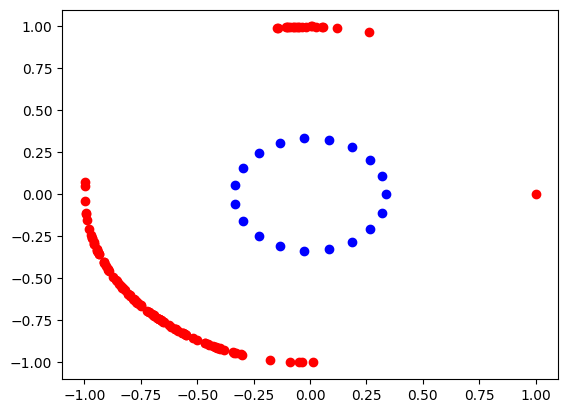

In [6]:
plt.plot(antenna_positions[:,0],
         antenna_positions[:,1],
         'bo',
         transmitter_positions[:,0],
         transmitter_positions[:,1],
         'ro'
         )
plt.show()

## MUSIC for DOA test

In [7]:
# Parameters for MUSIC

resolution = 0.15
time_t = 0

In [15]:
def cartesian_to_arg(cartesian_coords):
    return np.angle(cartesian_coords[0] + cartesian_coords[1] * 1j)

In [9]:
def plot_music_estimation(antenna_positions, cov, wavelength, transmitter_positions, nb_doas, time_t, resolution):
    doas, _, _, psd, thetas = music_algorithm(cov[time_t], antenna_positions, wavelength, nb_doas, resolution=resolution)
    thetas *= np.pi/180
    print(doas)
    plt.polar(list(map(cartesian_to_arg,transmitter_positions)), np.ones(len(transmitter_positions)), "go", thetas, psd/np.max(psd), '-k')
    plt.show()

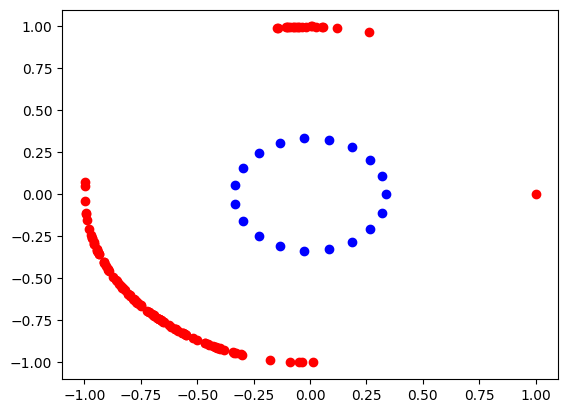

Dataset I
1


NameError: name 'plot_music_estimation' is not defined

In [20]:
antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data_1)

plt.plot(antenna_positions[:,0],
         antenna_positions[:,1],
         'bo',
         transmitter_positions[:,0],
         transmitter_positions[:,1],
         'ro'
         )
plt.show()

print("Dataset I")
for i in range(1, len(antenna_positions)):                 # interesting values: 4 - 12
    print(i)
    plot_music_estimation(antenna_positions, cov, wavelength, transmitter_positions, i, time_t, resolution)

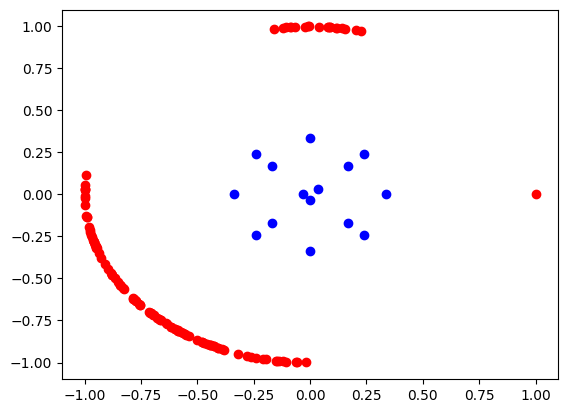

Dataset 2
1
[189.15 243.9 ]


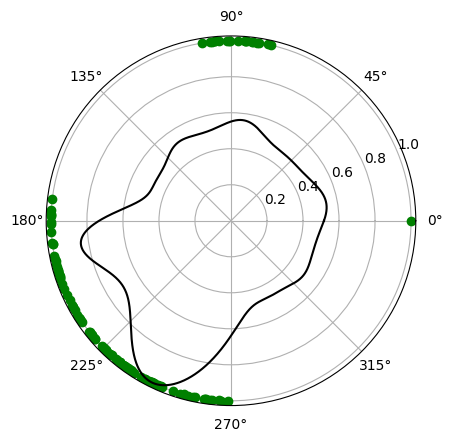

2
[ 88.65 185.85 227.4  263.25]


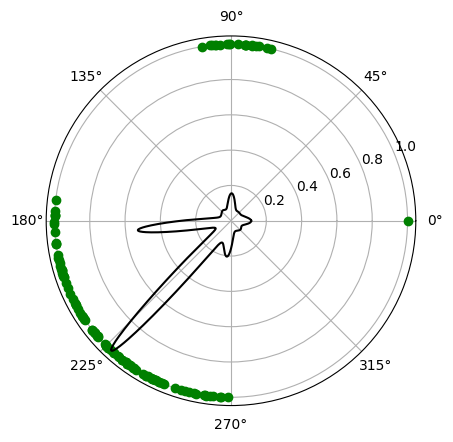

3
[208.2 235.5]


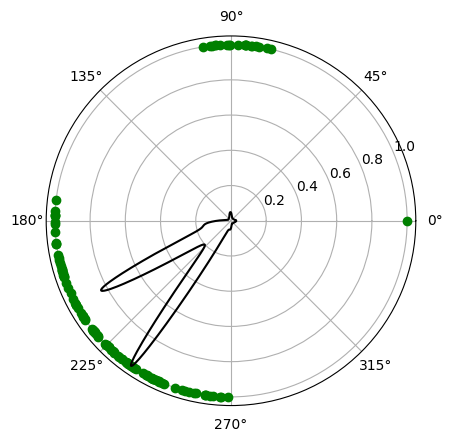

4
[ 88.5 208.2 231.6]


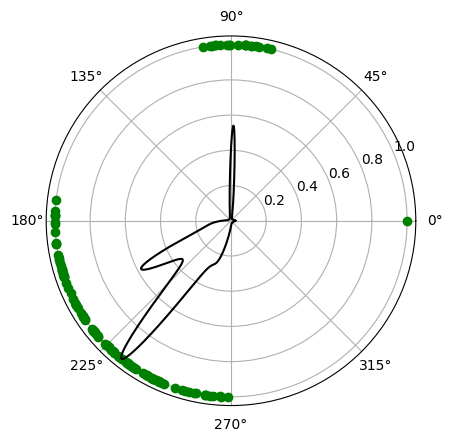

5
[ 87.15 201.45 222.45 241.65]


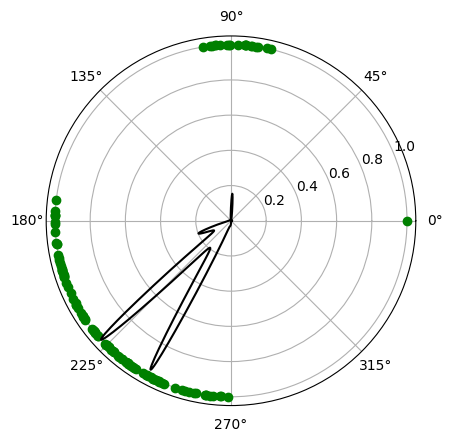

6
[ 86.55 189.75 219.45 237.75 257.85]


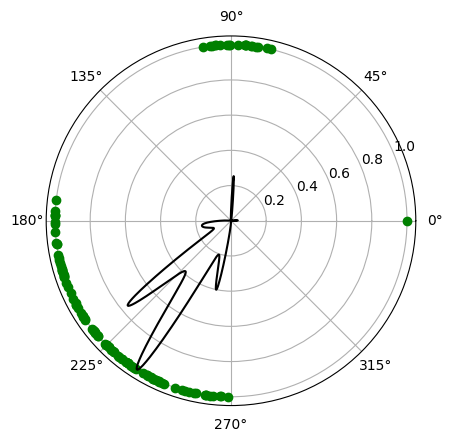

7
[ 82.35  93.15 182.1  200.25 222.6  236.85 261.75]


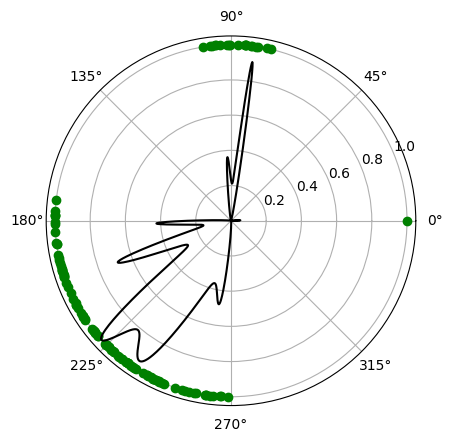

8
[ 82.5   93.45 181.95 200.85 225.9  262.05]


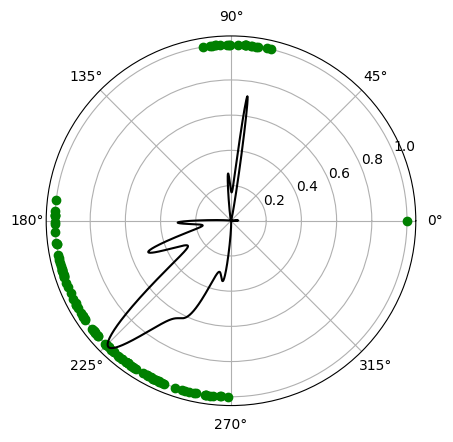

9
[ 82.5   94.5  181.8  201.75 227.1  247.05 262.8 ]


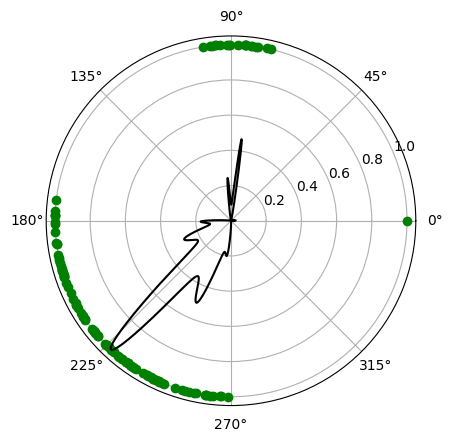

10
[ 82.65  94.5  181.65 201.3  226.95 246.45 262.8 ]


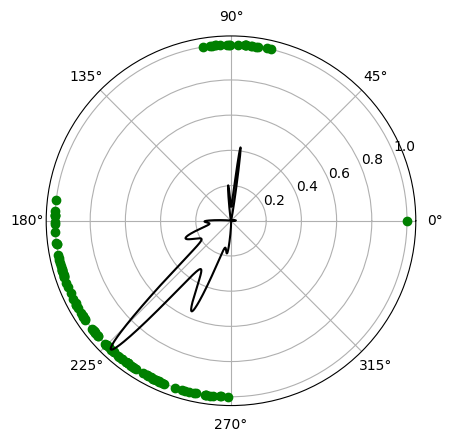

11
[ 82.5   94.35 180.3  208.8  227.7  246.75 263.85]


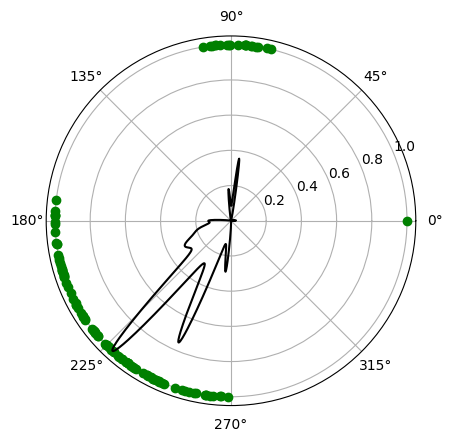

12
[ 82.65  94.8  179.25 198.6  226.5  247.65 264.75]


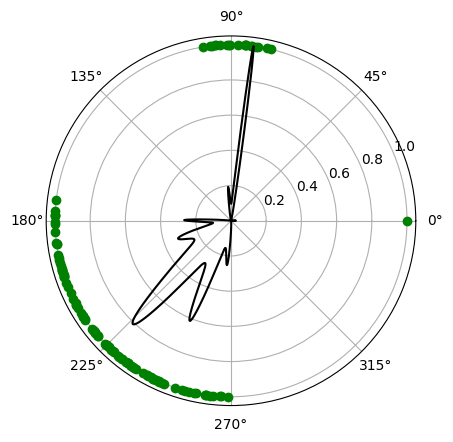

13
[ 82.65  93.15 178.5  196.8  224.25 249.45 265.5 ]


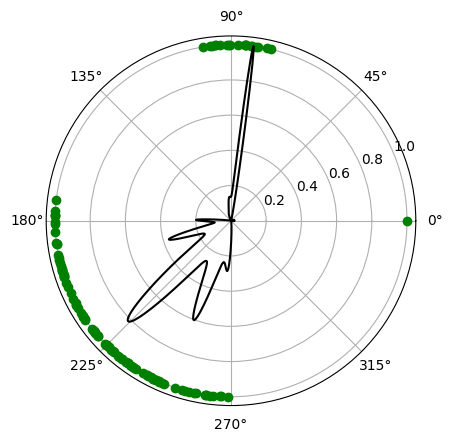

14
[ 81.9  180.45 199.95 223.35 242.55 262.8  358.95]


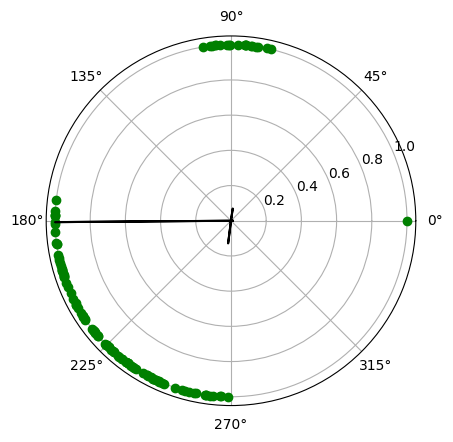

In [11]:
antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data_2)
plt.plot(antenna_positions[:,0],
         antenna_positions[:,1],
         'bo',
         transmitter_positions[:,0],
         transmitter_positions[:,1],
         'ro'
         )
plt.show()
print("Dataset 2")
for i in range(1, len(antenna_positions)):                 # interesting values: 4 - 12
    print(i)
    plot_music_estimation(antenna_positions, cov, wavelength, transmitter_positions, i, time_t, resolution)

In [12]:
# Simulated data

simulated_transmitter_positions = np.array(
    [
        [0, 1],
        [1, 0],
        [-1, 0],
        [0, -1]
    ]
)

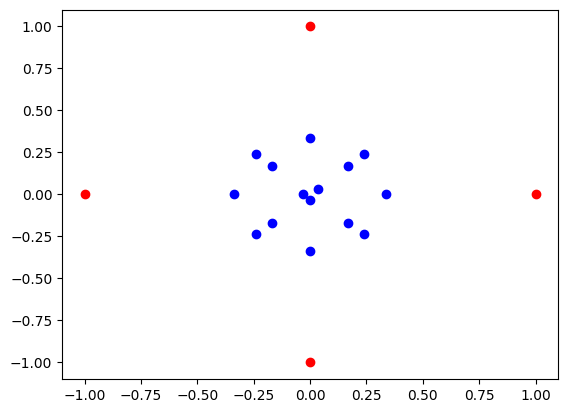

In [13]:
plt.plot(antenna_positions[:,0],
         antenna_positions[:,1],
         'bo',
         simulated_transmitter_positions[:,0],
         simulated_transmitter_positions[:,1],
         'ro'
         )
plt.show()

## Matched beamforming test

In [7]:
angle = 224.25
angle = angle * np.pi/180
r0 = np.array([np.cos(angle), np.sin(angle)])
b_gains, ts = matched_beam(antenna_positions, wavelength, r0)
b_gains.shape, ts.shape

((10000,), (10000,))

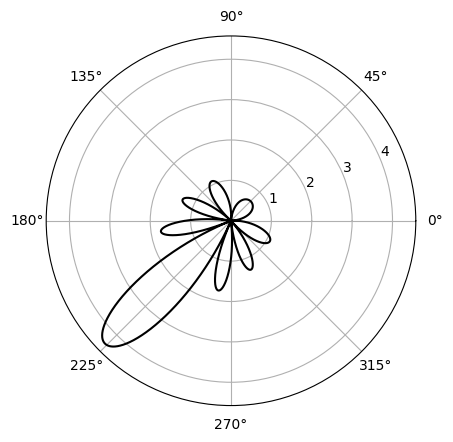

In [8]:
plt.polar(ts, b_gains, '-k')
plt.show()

In [7]:
antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data_1)
# 7271317.527537093 for dataset 1
# 6872221.912682234 for dataset 2

In [8]:
average_throughput(matched_beam, antenna_positions, wavelength, transmitter_positions)

7271317.527537093

In [17]:
variance_throughput(matched_beam, antenna_positions, wavelength, transmitter_positions)

16294541263063.334

In [9]:
antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data_2)

In [10]:
average_throughput(matched_beam, antenna_positions, wavelength, transmitter_positions)

6872221.912682234

In [20]:
variance_throughput(matched_beam, antenna_positions, wavelength, doas)

15009287646929.248

In [18]:
antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data_2)

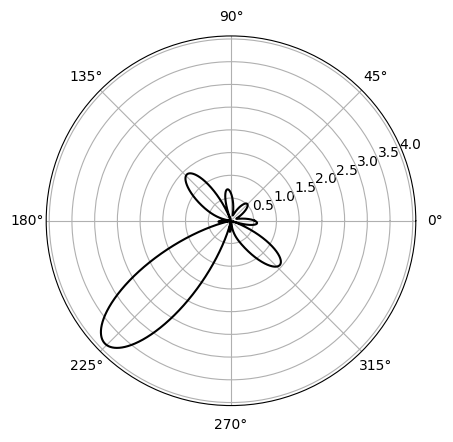

In [12]:
b_gains, ts = matched_beam(antenna_positions, wavelength, r0)
plt.polar(ts, b_gains, '-k')
plt.show()

In [23]:
average_throughput(matched_beam, antenna_positions, wavelength, transmitter_positions)

5234527.76758176

In [24]:
variance_throughput(matched_beam, antenna_positions, wavelength, transmitter_positions)

12036306254770.664

In [ ]:
# Using MUSIC to estimate DOAs, dataset 1
doas, _, _, _, _ = music_algorithm(cov[time_t], antenna_positions, wavelength, 13, resolution=resolution)
doas = [np.array([np.cos(t), np.sin(t)]) for t in doas]

In [ ]:
average_throughput(matched_beam, antenna_positions, wavelength, doas)

In [ ]:
variance_throughput(matched_beam, antenna_positions, wavelength, doas)

## Curious phenomenon!

In [ ]:
simulated_antenna_positions =  np.array(
    [
        [0, 0.05],
        [0.05, 0],
        [-0.05, 0],
        [0, -0.05]
    ]
)

In [ ]:
b_gains, ts = matched_beam(simulated_antenna_positions, wavelength, np.array([1,0]))
plt.polar(ts, b_gains, '-k')
plt.show()